<a href="https://colab.research.google.com/github/D1dix/proyecto_IAs/blob/main/Ejer-Pipeline-MadridBici/PipelineCompleto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Semilla para reproducibilidad
np.random.seed(42)

n = 365

# Variables independientes
temperatura = np.random.normal(18, 8, n)
temperatura = np.clip(temperatura, -2, 38)

humedad = np.random.normal(55, 15, n)
humedad = np.clip(humedad, 20, 95)

viento = np.random.exponential(12, n)
viento = np.clip(viento, 0, 45)

lluvia = np.random.exponential(3, n)
lluvia = np.clip(lluvia, 0, 35)

festivo = np.random.binomial(1, 0.08, n)
fin_semana = np.random.binomial(1, 2/7, n)

# Variable objetivo (con relacion real + ruido)
alquileres = (
    2200                           # base
    + 45 * temperatura             # mas calor = mas alquileres
    - 8 * humedad                  # humedad alta = menos
    - 15 * viento                  # viento = menos
    - 40 * lluvia                  # lluvia = mucho menos
    - 300 * festivo                # festivos = menos (gente fuera)
    + 400 * fin_semana             # fines de semana = mas (ocio)
    + np.random.normal(0, 150, n)  # ruido
)
alquileres = np.clip(alquileres, 800, 4500).astype(int)

# Crear matriz de datos
datos = np.column_stack([
    temperatura, humedad, viento, lluvia, festivo, fin_semana, alquileres
])

# Guardar CSV
np.savetxt(
    'madridbici.csv',
    datos,
    delimiter=',',
    header='temperatura,humedad,viento,lluvia,festivo,fin_semana,alquileres',
    comments='',
    fmt=['%.1f', '%.1f', '%.1f', '%.1f', '%d', '%d', '%d']
)

print("Dataset guardado: madridbici.csv")
print(f"Dimensiones: {datos.shape}")

Dataset guardado: madridbici.csv
Dimensiones: (365, 7)


**Fase 1: Exploracion**

1. Cargad el CSV con `np.genfromtxt()` (skip_header=1, delimiter=',')
2. Verificad las dimensiones con `.shape`
3. Separad las features (columnas 0-5) del target (columna 6)
4. Para cada variable, calculad e imprimid:
    - Media
    - Desviacion tipica
    - Minimo y maximo
5. Responded a estas preguntas en comentarios:
    - ¿Cual es el rango de alquileres?
    - ¿Que variable tiene mayor dispersion relativa (std/mean)?
    - ¿Hay algun valor que parezca anomalo?

(365, 7)
Variable: temperatura
Minimo: -2.0 Maximo: 38.0
Media: 18.064383561643837 Desviacion tipica: 7.402827483940852
Variable: humedad
Minimo: 20.0 Maximo: 95.0
Media: 54.44630136986301 Desviacion tipica: 15.140221990993838
Variable: viento
Minimo: 0.1 Maximo: 45.0
Media: 12.123835616438356 Desviacion tipica: 11.220580727546547
Variable: lluvia
Minimo: 0.0 Maximo: 22.3
Media: 3.1164383561643834 Desviacion tipica: 3.147045306951944
Variable: festivo
Minimo: 0.0 Maximo: 1.0
Media: 0.07945205479452055 Desviacion tipica: 0.2704430176274645
Rango de alquileres: 2913.0
(365, 7)
Variable con mayor dispersion relativa: humedad


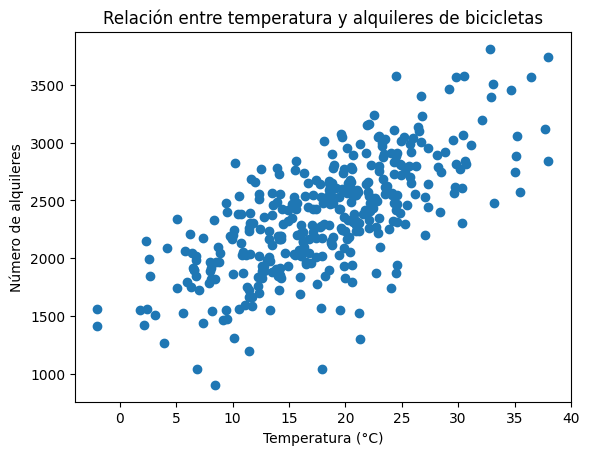

In [2]:
datos_csv = np.genfromtxt("madridbici.csv", skip_header=1, delimiter=",")

nombres = ["temperatura", "humedad", "viento", "lluvia", "festivo", "fin_semana", "alquileres"]

print(datos_csv.shape)
#print(datos_csv[:5])

temperatura = datos_csv[:, 0]
humedad = datos_csv[:, 1]
viento = datos_csv[:, 2]
lluvia = datos_csv[:, 3]
festivo = datos_csv[:, 4]
fin_semana = datos_csv[:, 5]
alquileres = datos_csv[:, 6]

datos_t = datos_csv[:, (0,1,2,3,4)]
#print(datos_t.shape)

array = np.zeros(5)

for i in range(datos_t.shape[1]):
    print(f"Variable: {nombres[i]}")
    print(f"Minimo: {np.min(datos_t[:, i])}", f"Maximo: {np.max(datos_t[:, i])}")
    print(f"Media: {np.mean(datos_t[:, i])}", f"Desviacion tipica: {np.std(datos_t[:, i])}")
    array[i] = np.mean(datos_t[:, i]) / np.std(datos_t[:, i])

# ¿Cual es el rango de alquileres?

print(f"Rango de alquileres: {np.max(alquileres) - np.min(alquileres)}")
print(datos_csv.shape)

# ¿Que variable tiene mayor dispersion relativa (std/mean)?

print(f"Variable con mayor dispersion relativa: {nombres[np.argmax(array)]}")

# ¿Hay algun valor que parezca anomalo?

#No se a que te refieres Te dejo una grafica Bonita

plt.figure()
plt.scatter(temperatura, alquileres)
plt.xlabel("Temperatura (°C)")
plt.ylabel("Número de alquileres")
plt.title("Relación entre temperatura y alquileres de bicicletas")
plt.show()



### Fase 2: Limpieza

1. Comprobad si hay valores NaN: `np.isnan(datos).sum()`
2. Aplicad clip a las variables continuas para eliminar outliers extremos:
    - temperatura: [-5, 40]
    - humedad: [15, 100]
    - viento: [0, 50]
    - lluvia: [0, 40]
3. Verificad cuantos valores fueron modificados por el clip


In [17]:
# 1. Comprobad si hay valores NaN:
nan_count = np.isnan(datos_csv).sum()
print(f"Número de valores NaN: {nan_count}")

# 2. Aplicad clip a las variables continuas para eliminar outliers extremos

print(f"Temperatura: {(temperatura<-5).sum()} valores < -5, {(temperatura>40).sum()} valores > 40")

print(f"Humedad: {(humedad<15).sum()} valores < 15, {(humedad>100).sum()} valores > 100")

print(f"Viento: {(viento<0).sum()} valores < 0, {(viento>50).sum()} valores > 50")

print(f"Lluvia: {(lluvia<0).sum()} valores < 0, {(lluvia>40).sum()} valores > 40")

temperatura_limpio = np.clip(temperatura, -5,40)
humedad_limpio = np.clip(humedad, 15, 100)
viento_limpio = np.clip(viento, 0, 50)
lluvia_limpio = np.clip(lluvia, 0, 40)

# 3. Verficad cuantos valores fueron modificados por el clip
mod_temp = np.sum(temperatura != temperatura_limpio)
print(f"Temperatura: valores modificados = {mod_temp}")

mod_hum = np.sum(humedad != humedad_limpio)
print(f"Humedad: valores modificados = {mod_hum}")

mod_viento = np.sum(viento != viento_limpio)
print(f"Viento: valores modificados = {mod_viento}")

mod_lluvia = np.sum(lluvia != lluvia_limpio)
print(f"Lluvia: valores modificados = {mod_lluvia}")

print("Antes:", temperatura.min(), temperatura.max())
print("Después:", temperatura_limpio.min(), temperatura_limpio.max())



Número de valores NaN: 0
Temperatura: 0 valores < -5, 0 valores > 40
Humedad: 0 valores < 15, 0 valores > 100
Viento: 0 valores < 0, 0 valores > 50
Lluvia: 0 valores < 0, 0 valores > 40
Temperatura: valores modificados = 0
Humedad: valores modificados = 0
Viento: valores modificados = 0
Lluvia: valores modificados = 0
Antes: -2.0 38.0
Después: -2.0 38.0


### Fase 3: Análisis

1. Calculad la correlación de cada feature con el target:
   
2. Identificad las 4 features con mayor correlación absoluta
3. Cread una máscara booleana para seleccionar esas 4 features
4. Aplicad la máscara usando list comprehension con zip
5. Responded en comentarios:
    - ¿Qué features descartáis y por qué?
    - ¿La correlación más alta es positiva o negativa? ¿Tiene sentido?
6. Detectad outliers en el target usando IQR:

In [4]:

features_list = [datos_csv[:, i] for i in range(6)]
nombres_features = nombres[:6]
target = datos_csv[:, 6]

print("Correlación de cada feature con el target (Alquileres):")
for nombre, feat in zip(nombres_features, features_list):
    r = np.corrcoef(target, feat)[0, 1]
    print(f"→ {nombre}: {r:.2f}")

correlaciones = np.array([
    np.corrcoef(target, f)[0, 1]
    for f in features_list
])

umbral = 0.3
mascara = np.abs(correlaciones) > umbral

nombres_selec = [n for n, m in zip(nombres_features, mascara) if m]
features_selec = [f for f, m in zip(features_list, mascara) if m]

print(f"\nMáscara booleana (|r| > {umbral}): {mascara}")
print(f"Features seleccionadas: {nombres_selec}")

q1 = np.percentile(target, 25)
q3 = np.percentile(target, 75)
iqr = q3 - q1

limite_inf = q1 - 1.5 * iqr
limite_sup = q3 + 1.5 * iqr


outliers_mask = (target < limite_inf) | (target > limite_sup)
print(f"\nOutliers detectados en alquileres: {outliers_mask.sum()}")

alquileres_clipped = np.clip(target, limite_inf, limite_sup)


datos_csv[:, 6] = alquileres_clipped
print("Dataset actualizado con valores 'clipped' en la columna de alquileres.")

Correlación de cada feature con el target (Alquileres):
→ temperatura: 0.70
→ humedad: -0.34
→ viento: -0.28
→ lluvia: -0.30
→ festivo: -0.17
→ fin_semana: 0.41

Máscara booleana (|r| > 0.3): [ True  True False  True False  True]
Features seleccionadas: ['temperatura', 'humedad', 'lluvia', 'fin_semana']

Outliers detectados en alquileres: 5
Dataset actualizado con valores 'clipped' en la columna de alquileres.


### Fase 4: Preparar Datos

1. Dividid en train (80%) y test (20%):    
2. Calculad media y std de cada feature SOLO con datos de train
3. Normalizad train y test usando las estadísticas de train:
4. Construid las matrices X_train y X_test:
    - Añadid columna de unos al principio
    - Usad `np.column_stack()`
5. Verificad las dimensiones finales:
    - X_train debe ser (292, 5) si usáis 4 features
    - X_test debe ser (73, 5)
6. Pregunta de verificación: ¿Por qué 5 columnas si solo hay 4 features?

In [5]:
# 1. Dividid en train (80%) y test (20%)
n = len(temperatura)
index = int(n * 0.8)

temp_train, temp_test = temperatura[:index], temperatura[index:]
hum_train, hum_test = humedad[:index], humedad[index:]
viento_train, viento_test = viento[:index], viento[index:]
lluvia_train, lluvia_test = lluvia[:index], lluvia[index:]
festivo_train, festivo_test = festivo[:index], festivo[index:]
finsem_train, finsem_test = fin_semana[:index], fin_semana[index:]

print(f"Tamaño train: {len(temp_train)}, tamaño test: {len(temp_test)}")

# 2. Calculad la media y std de cada feature SOLO con datos de train
temp_train_mean = np.mean(temp_train)
temp_train_std = np.std(temp_train)
print(f"Train temperatura: Media = {temp_train_mean} std = {temp_train_std}")

hum_train_mean = np.mean(hum_train)
hum_train_std = np.std(hum_train)
print(f"Train humedad: Media = {hum_train_mean} std = {hum_train_std}")

viento_train_mean = np.mean(viento_train)
viento_train_std = np.std(viento_train)
print(f"Train viento: Media = {viento_train_mean} std = {viento_train_std}")

lluvia_train_mean = np.mean(lluvia_train)
lluvia_train_std = np.std(lluvia_train)
print(f"Train lluvia: Media = {lluvia_train_mean} std = {lluvia_train_std}")

# 3. Normalizad train y test usando las estadísticas de train
temp_train_norm = (temp_train - temp_train_mean) / temp_train_std
temp_test_norm = (temp_test - temp_train_mean) / temp_train_std
print(f"Train: media={temp_train_norm.mean():.2f}, std={temp_train_norm.std():.2f}")
hum_train_norm = (hum_train - hum_train_mean) / hum_train_std
hum_test_norm = (hum_test - hum_train_mean) / hum_train_std
print(f"Train: media={hum_train_norm.mean():.2f}, std={hum_train_norm.std():.2f}")
viento_train_norm = (viento_train - viento_train_mean) / viento_train_std
viento_test_norm = (viento_test - viento_train_mean) / viento_train_std
print(f"Train: media={viento_train_norm.mean():.2f}, std={viento_train_norm.std():.2f}")
lluvia_train_norm = (lluvia_train - lluvia_train_mean) / lluvia_train_std
lluvia_test_norm = (lluvia_test - lluvia_train_mean) / lluvia_train_std
print(f"Train: media={lluvia_train_norm.mean():.2f}, std={lluvia_train_norm.std():.2f}")

# 4. Construid las matrices X_train y X_test:
  # Añadid columna de unos al principio
  # Usad np.column_stack()

# Construir X_train: columna de 1s + features normalizadas
X_train = np.column_stack([
    np.ones(len(temp_train)),
    temp_train_norm,
    hum_train_norm,
    viento_train_norm,
    lluvia_train_norm,
])

# Construir X_test con la misma estructura
X_test = np.column_stack([
    np.ones(len(temp_test)),
    temp_test_norm,
    hum_test_norm,
    viento_test_norm,
    lluvia_test_norm,
])

y_train = target[:index] # Desde el inicio hasta índice 292
y_test = target[index:] # Desde índice 292 hasta el final

print(f"X_train: {X_train.shape}, X_test: {X_test.shape}")


Tamaño train: 292, tamaño test: 73
Train temperatura: Media = 17.863698630136987 std = 7.711087730752904
Train humedad: Media = 54.70239726027397 std = 15.408129005775576
Train viento: Media = 12.62945205479452 std = 11.404848571227623
Train lluvia: Media = 3.117465753424658 std = 3.111050193041201
Train: media=-0.00, std=1.00
Train: media=0.00, std=1.00
Train: media=0.00, std=1.00
Train: media=-0.00, std=1.00
X_train: (292, 5), X_test: (73, 5)


### Fase 5: Entrenar y Evaluar

1. Entrenad el modelo:
    
2. Imprimid los pesos con sus nombres:
    
    
3. Interpretad cada peso en el contexto del problema (escribid comentarios)
4. Calculad predicciones para train y test:
    
5. Calculad MAE para ambos conjuntos
6. Responded en comentarios:
    - ¿El modelo tiene underfitting, overfitting, o buen ajuste?
    - ¿Qué MAE os parece aceptable para este problema?
    - Si el MAE es 200, ¿qué significa en términos de negocio?

In [6]:
w, _, _, _ = np.linalg.lstsq(X_train, y_train, rcond=None)

print(f"Pesos del modelo: {w}")

nombres = ['intercepto', 'feat1', 'feat2', 'feat3', 'feat4']
for nombre, peso in zip(nombres, w):
    print(f"{nombre}: {peso:.2f}")

#comnetarios

# Predecir en train y test
y_pred_train = X_train @ w
y_pred_test = X_test @ w

# Calcular MAE (Mean Absolute Error)
mae_train = np.abs(y_train - y_pred_train).mean()
mae_test = np.abs(y_test - y_pred_test).mean()

print(f"MAE train: {mae_train:.2f}")
print(f"MAE test: {mae_test:.2f}")

#pREGUNTAS

Pesos del modelo: [2337.77568493  360.96442862 -130.29514752 -168.42189546 -132.82501729]
intercepto: 2337.78
feat1: 360.96
feat2: -130.30
feat3: -168.42
feat4: -132.83
MAE train: 185.76
MAE test: 210.98


### Fase 6: Simulación

Escenario: Se prevé una ola de calor para la próxima semana. Queréis estimar la demanda esperada para un día con temperatura alta pero incierta.

1. Definid el escenario:
    - Temperatura esperada: 35°C con incertidumbre de 3°C
    - Humedad: 40% (fija)
    - Viento: 5 km/h (fijo)
    - Lluvia: 0 mm (fijo)
    - Día laborable normal
2. Generad 10000 escenarios de temperatura:
    
    
3. Normalizad las temperaturas simuladas con las estadísticas de train
4. Construid X para cada escenario y calculad predicciones
5. Calculad percentiles 5, 50 y 95
6. Responded en comentarios:
    - ¿Cuántas bicicletas debería preparar operaciones si quiere cubrir el 95% de los escenarios?
    - ¿Cuál es el rango de incertidumbre (P95 - P5)?
    - ¿Es un rango aceptable para planificación?

--- RESULTADOS DE LA SIMULACIÓN ---
Percentil 5 (Mínimo esperado):  3283 bicicletas
Percentil 50 (Mediana):         3512 bicicletas
Percentil 95 (Máximo esperado):  3743 bicicletas

Operaciones debería preparar 3743 bicicletas.
Rango de incertidumbre: 460 bicicletas


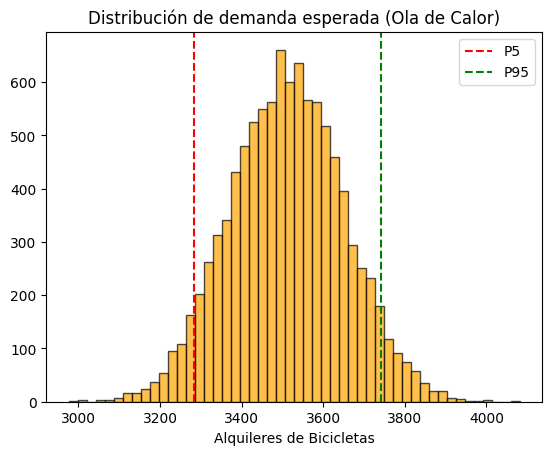

In [7]:
np.random.seed(123)

# 1. Definid el escenario
temp_esperada = 35
temp_incertidumbre = 3
humedad_fija = 40
viento_fijo = 5
lluvia_fija = 0

# 2. Generad 10000 escenarios de temperatura
n_escenarios = 10000
temp_simulada = np.random.normal(temp_esperada, temp_incertidumbre, n_escenarios)

# 3. Construid X para cada escenario (Normalizando al vuelo)
# Usamos las medias y desviaciones del TRAIN (calculadas en la Fase 4/5)
X_escenarios = np.column_stack([
    np.ones(n_escenarios),
    (temp_simulada - temp_train_mean) / temp_train_std,
    np.full(n_escenarios, (humedad_fija - hum_train_mean) / hum_train_std),
    np.full(n_escenarios, (viento_fijo - viento_train_mean) / viento_train_std),
    np.full(n_escenarios, (lluvia_fija - lluvia_train_mean) / lluvia_train_std),
])

# 4. ¡PASO CLAVE!: Calcular la predicción de demanda para los 10,000 casos
# Usamos el operador @ para multiplicar la matriz por el vector de pesos 'w'
predicciones_sim = X_escenarios @ w

# 5. Calculad percentiles sobre las PREDICCIONES (no sobre la temperatura)
p5, p50, p95 = np.percentile(predicciones_sim, [5, 50, 95])

print(f"--- RESULTADOS DE LA SIMULACIÓN ---")
print(f"Percentil 5 (Mínimo esperado):  {p5:.0f} bicicletas")
print(f"Percentil 50 (Mediana):         {p50:.0f} bicicletas")
print(f"Percentil 95 (Máximo esperado):  {p95:.0f} bicicletas")

# ¿Cuántas bicicletas debería preparar operaciones si quiere cubrir el 95% de los escenarios?
# Respuesta: Deben preparar el valor del P95 para asegurarse de no quedarse cortos.
print(f"\nOperaciones debería preparar {p95:.0f} bicicletas.")

# ¿Cuál es el rango de incertidumbre (P95 - P5)?
rango_incertidumbre = p95 - p5
print(f"Rango de incertidumbre: {rango_incertidumbre:.0f} bicicletas")

plt.hist(predicciones_sim, bins=50, color='orange', edgecolor='black', alpha=0.7)
plt.axvline(p5, color='red', linestyle='--', label='P5')
plt.axvline(p95, color='green', linestyle='--', label='P95')
plt.title("Distribución de demanda esperada (Ola de Calor)")
plt.xlabel("Alquileres de Bicicletas")
plt.legend()
plt.show()

### Fase 7: Producción

1. Guardad el modelo:

    
2. Cread una función de predicción:
    

3. Probad la función con estos casos:
    - Día soleado de primavera: temp=22, humedad=50, viento=10, lluvia=0, laborable
    - Día lluvioso de invierno: temp=8, humedad=80, viento=20, lluvia=15, laborable
    - Sábado de verano: temp=32, humedad=35, viento=5, lluvia=0, fin de semana
4. Cread un archivo README.md con:
    - Descripción del modelo
    - Variables utilizadas
    - MAE obtenido
    - Instrucciones de uso
    - Limitaciones conocidas

In [8]:
medias = np.array([temp_train_mean, hum_train_mean, viento_train_mean, lluvia_train_mean])
stds = np.array([temp_train_std, hum_train_std, viento_train_std, lluvia_train_std])

np.savez(
    'modelo_madridbici.npz',
    pesos=w,
    medias=medias,
    stds=stds,
    features_usadas=['temp', 'humedad', 'viento', 'lluvia'],
    mae_test=mae_test
)
print("Modelo guardado correctamente como 'modelo_madridbici.npz'")

def predecir_demanda(temp, hum, viento, lluvia): #Añadir de fin_semana
    """
    Predice la demanda de bicicletas basándose en el modelo guardado.
    """
    # Cargar modelo
    m = np.load('modelo_madridbici.npz')
    w_prod = m['pesos']
    medias_prod = m['medias']
    stds_prod = m['stds']

    # Normalizar los inputs usando las estadísticas del entrenamiento
    inputs_raw = np.array([temp, hum, viento, lluvia])
    inputs_norm = (inputs_raw - medias_prod) / stds_prod

    # Construir vector X (añadiendo el 1 del intercepto)
    x_input = np.insert(inputs_norm, 0, 1)

    # Calcular predicción (y = X · w)
    prediccion = x_input @ w_prod

    # Retornar entero (no tiene sentido media bicicleta) y no negativo
    return int(max(0, np.round(prediccion)))

casos = [
    ("Primavera Soleada", 22, 50, 10, 0),
    ("Invierno Lluvioso", 8, 80, 20, 15),
    ("Verano (Sábado)", 32, 35, 5, 0)
]

print("\n--- TEST DE PRODUCCIÓN ---")
for nombre, t, h, v, l in casos:
    demanda = predecir_demanda(t, h, v, l)
    print(f"{nombre}: {demanda} alquileres estimados.")

readme_content = f"""
# Modelo de Predicción MadridBici 🚲

### Descripción
Modelo de Regresión Lineal desarrollado en NumPy para predecir la demanda diaria
del sistema público de bicicletas basado en variables meteorológicas.

### Variables Utilizadas
- Temperatura (°C)
- Humedad (%)
- Velocidad del viento (km/h)
- Precipitación (mm)

### Rendimiento
- **MAE (Error Medio Absoluto):** {mae_test:.2f} bicicletas.

### Instrucciones de uso
1. Cargar el archivo `modelo_madridbici.npz`.
2. Normalizar los datos de entrada con las medias/stds guardadas.
3. Ejecutar la función `predecir_demanda()`.

### Limitaciones
- No incluye factores de eventos especiales (manifestaciones, huelgas).
- El modelo asume una relación lineal entre el clima y la demanda.
"""

with open('README.md', 'w') as f:
    f.write(readme_content)
print("\nArchivo README.md generado.")


Modelo guardado correctamente como 'modelo_madridbici.npz'

--- TEST DE PRODUCCIÓN ---
Primavera Soleada: 2743 alquileres estimados.
Invierno Lluvioso: 1046 alquileres estimados.
Verano (Sábado): 3412 alquileres estimados.

Archivo README.md generado.
